# Head 1st / Head 2nd / Work 1st / Work 2nd

In [1]:
import pyreadstat
import os
import gc
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

.sav ===> import pyreadstat, pyreadstat.read_sav(file_path)

.sas7bdat  ====> pandas, pd.read_sas(file_path)

.dta  ===> pd.read_stata(file_path)

In [2]:
def call_df():
    path = 'C:/Users/hml76/Desktop/Jupyter/HRD_With_MJ/HCCPII_20230828/'
    file_path = path+'2. SPSS/HCCP_2ndWave_Work_2nd.sav'

    dataframe, meta = pyreadstat.read_sav(file_path)
    columns_to_drop0 = ['W21ID2', 'W21ID3']
    dataframe = dataframe.drop(columns=columns_to_drop0)
    
    #y = df[y_name]
    #df.drop(columns=[y_name])
    gc.collect()
    return dataframe

In [3]:
def check_nan(input_dataframe):
    nan_values = input_dataframe.isna()
    nan_count_per_column = nan_values.sum()
    Nan_cols = []
    columns_with_nan = nan_count_per_column[nan_count_per_column > 0]  # Filter columns with NaN values
    print("Columns with NaN values and count of NaN values:")
    for column, count in columns_with_nan.items():
        print(f"Column '{column}' has {count} NaN value(s).")
        Nan_cols.append(column)    
        
    dataframe = input_dataframe.drop(columns=Nan_cols)
    return dataframe


def equal_distirubution(dataframe, y_lst, class_idx):
    class_counts = dataframe[y_lst[class_idx]].value_counts()
    print(class_counts)
    max_samples, min_samples = class_counts.max(), class_counts.min()
    
    balanced_df = pd.DataFrame()  # Initialize an empty DataFrame to store the balanced data
    
    for class_label, count in class_counts.items():
        if count == min_samples:      # If the class count is equal to the maximum number of samples, keep all samples
            balanced_df = pd.concat([balanced_df, dataframe[dataframe[Y[class_idx]] == class_label]])
        else:
            sampled_df = dataframe[dataframe[Y[class_idx]] == class_label].sample(min_samples, replace=True)  # Randomly sample the same number of samples from the class
            balanced_df = pd.concat([balanced_df, sampled_df])
    
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle the rows 
    y_balanced = balanced_df[Y[class_idx]]
    print(y_balanced.value_counts())
    X_balanced = balanced_df.drop(columns=Y)
    
    return X_balanced, y_balanced

In [24]:
def XGBoost(X_balanced, y_balanced, num_boost_round = 300):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    model = XGBClassifier(n_estimators=num_boost_round)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("\tAccuracy ========> ", accuracy)
    
    #plot_importance(model, max_num_features=10)
    #plt.show()
    
    return model, X_train, X_test, y_test

In [8]:
def feature_imp1(input_model, X_train_, top_k):
    feature_importance = input_model.feature_importances_
    top_indices = np.argsort(feature_importance)[::-1][:top_k]
    top_indices = X.columns[top_indices]
    print(top_indices)
    #for feature, importance in zip(top_5_features, feature_importance[top_5_indices]):
    #    print(f"{feature}: {importance}")

    #sorted_idx = np.argsort(feature_importance)[::-1]
    #top_features = X_train_.columns[sorted_idx][:top_k]
    #print("\nTop 10 Feature Importance:")
    #for i, feature in enumerate(top_features):
    #    print(f"{i+1}. {feature}: {feature_importance[sorted_idx[i]]:.4f}")

In [9]:
def feature_imp2(input_model, max_num_features):
    plot_importance(input_model, max_num_features)
    plt.show()

In [10]:
def class_one_to_five_TO_one_to_two(dataframe, y_lst, class_idx):
    dataframe_1 = dataframe[dataframe[y_lst[class_idx]] != 3]
    dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
    #dataframe_1 = dataframe_1.drop(columns=y_lst[class_idx])
    #print(dataframe_1[y_lst[class_idx]])
    return dataframe_1

In [11]:
def erase_col_for_importance(dataframe, erase_col_lst):
    dataframe = dataframe.drop(columns=erase_col_lst)
    
    return dataframe

In [12]:
scaler = MinMaxScaler()
df = call_df()
df = check_nan(df)
DF = copy.deepcopy(df)

Columns with NaN values and count of NaN values:
Column 'W21Q11A2' has 2349 NaN value(s).
Column 'W21Q11B2' has 3583 NaN value(s).
Column 'W21Q15A2' has 4487 NaN value(s).
Column 'W21Q15B2' has 3978 NaN value(s).
Column 'W21Q15C2' has 3584 NaN value(s).
Column 'W21Q15D2' has 5690 NaN value(s).
Column 'W21Q15E2' has 6613 NaN value(s).
Column 'W21Q16A2' has 6895 NaN value(s).
Column 'W21Q16B2' has 9294 NaN value(s).
Column 'W21Q16C2' has 9409 NaN value(s).
Column 'W21Q16D2' has 9456 NaN value(s).
Column 'W21Q191' has 6105 NaN value(s).
Column 'W21Q192' has 6105 NaN value(s).
Column 'W21Q31A' has 1259 NaN value(s).
Column 'W21Q31B' has 8119 NaN value(s).
Column 'W21DQ041' has 1536 NaN value(s).


# 1. 비공식학습 참여여부

(1)동료에 의한 코칭 및 멘토링_비공식적 학습 방법 참여 여부

(2)상사에 의한 코칭 및 멘토링_비공식적 학습 방법 참여 여부

(3)직원들 개개인 간의 지식 및 노하우 공유_비공식적 학습 방법 참여 여부

(4)사내 플랫폼을 통한 지식 공유_비공식적 학습 방법 참여 여부

(5)직무순환을 통한 학습_비공식적 학습 방법 참여 여부

In [47]:
#binary class
Y = ['W21Q15A1', 'W21Q15B1', 'W21Q15C1', 'W21Q15D1', 'W21Q15E1'] #1. 비공식학습 참여여부  => 성능 나쁨; 거의 65% 
#Y2 = ['W21Q15A2', 'W21Q15B2', 'W21Q15C2', 'W21Q15D2', 'W21Q15E2'] # 비공식학습 학습성과 

#for i in range(len(Y)):
for i in range(1):
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X, y = equal_distirubution(df, Y, i)
    y=y-1
    
    X = erase_col_for_importance(X, list2)
    model, x_tr = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)


 W21Q15A1 

1.0    5029
2.0    4487
Name: W21Q15A1, dtype: int64
1.0    4487
2.0    4487
Name: W21Q15A1, dtype: int64
Accuracy: 0.7331476323119778
Index(['W21Q12B', 'W21Q083E', 'W21Q10A', 'W21Q22D', 'W21Q11A1'], dtype='object')


# 3. 자기주도학습 참여여부

(1)학원 수강료 지원 제도_2019년 자기주도적 학습 지원 제도 참여 여부

(2)국내 대학 등록금 지원 제도_2019년 자기주도적 학습 지원 제도 참여 여부

(3)국내 대학원 등록금 지원 제도_2019년 자기주도적 학습 지원 제도 참여 여부

(4)해외 대학원 학위과정 지원 제도_2019년 자기주도적 학습 지원 제도 참여 여부

In [22]:
#Binary Class
Y = ['W21Q16A1', 'W21Q16B1', 'W21Q16C1', 'W21Q16D1']  #2. 자기주도학습 참여여부 => 성능 괜찮음: 76 ~ 92%
#Y2 = ['W21Q16A2', 'W21Q16B2', 'W21Q16C2', 'W21Q16D2']  #자기주도학습 학습성과


 W21Q16A1 

2.0    6895
1.0    2621
Name: W21Q16A1, dtype: int64
2.0    2621
1.0    2621
Name: W21Q16A1, dtype: int64


C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.7416587225929456


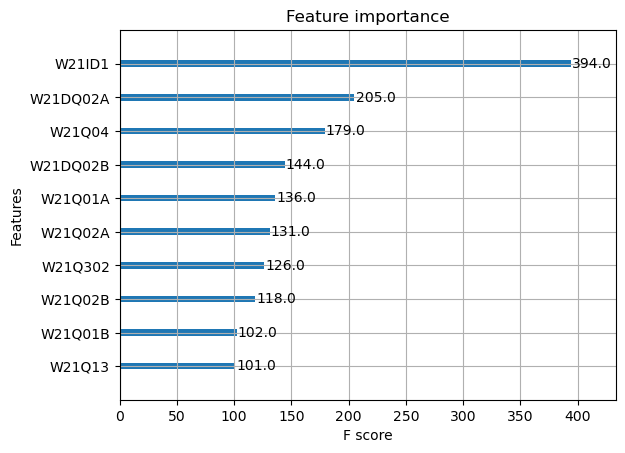


Top 10 Feature Importance:
1. W21Q12B: 0.0325
2. W21Q11B1: 0.0255
3. W21Q17: 0.0242
4. W21Q10A: 0.0167
5. W21Q14B: 0.0165
6. W21Q062C: 0.0128
7. W21Q13: 0.0123
8. W21DQ04: 0.0123
9. W21Q25E: 0.0120
10. W21Q24D: 0.0118

 W21Q16B1 

2.0    9294
1.0     222
Name: W21Q16B1, dtype: int64
1.0    222
2.0    222
Name: W21Q16B1, dtype: int64


C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.7640449438202247


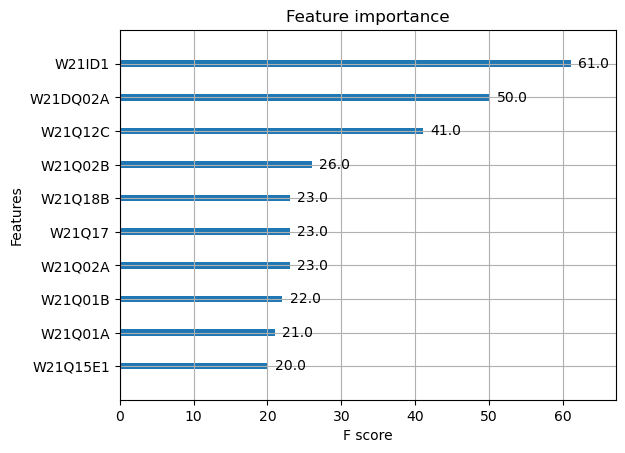


Top 10 Feature Importance:
1. W21Q12C: 0.0596
2. W21Q11A1: 0.0499
3. W21Q25J: 0.0401
4. W21Q24E: 0.0384
5. W21Q082B: 0.0351
6. W21Q15C1: 0.0339
7. W21Q23C: 0.0299
8. W21Q23D: 0.0187
9. W21Q12B: 0.0183
10. W21Q10C: 0.0180

 W21Q16C1 

2.0    9409
1.0     107
Name: W21Q16C1, dtype: int64
2.0    107
1.0    107
Name: W21Q16C1, dtype: int64


C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.7906976744186046


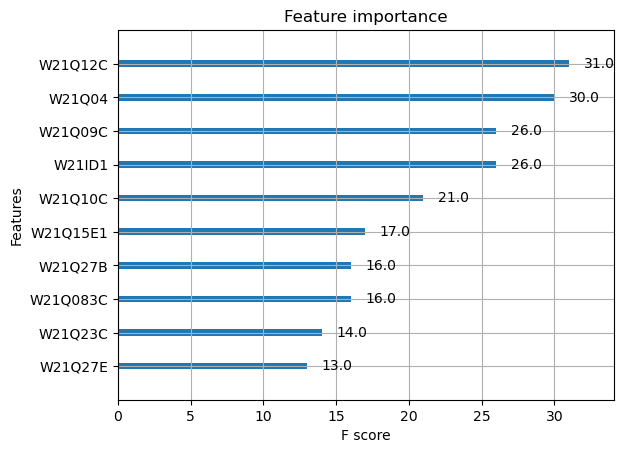


Top 10 Feature Importance:
1. W21Q12C: 0.1043
2. W21Q083B: 0.0563
3. W21Q301: 0.0478
4. W21Q11A1: 0.0378
5. W21Q15A1: 0.0377
6. W21Q14C: 0.0357
7. W21Q10C: 0.0309
8. W21Q062B: 0.0309
9. W21Q12B: 0.0307
10. W21Q23D: 0.0302

 W21Q16D1 

2.0    9456
1.0      60
Name: W21Q16D1, dtype: int64
2.0    60
1.0    60
Name: W21Q16D1, dtype: int64


C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.875


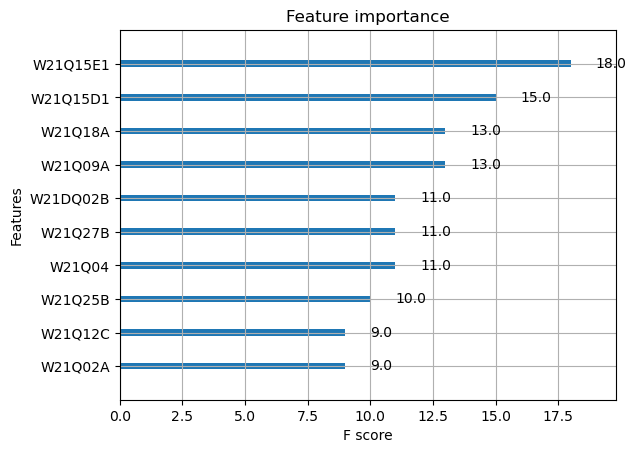


Top 10 Feature Importance:
1. W21Q083C: 0.1347
2. W21Q26B: 0.0937
3. W21Q15D1: 0.0782
4. W21Q24E: 0.0581
5. W21Q15A1: 0.0426
6. W21Q23D: 0.0382
7. W21Q02A: 0.0355
8. W21Q12B: 0.0318
9. W21Q10C: 0.0317
10. W21Q061A: 0.0302


In [23]:
for i in range(len(Y)):
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X, y = equal_distirubution(df, Y, i)
    
    y=y-1
    model, x_tr = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)

# 5. 조직신뢰 

(1)직원들에게 회사 사정을 소상하게 알려준다

(2)상급자에게 의견을 자유롭게 낼 수 있다

(3)부서간의 커뮤니케이션이 잘 되는 편이다

(4)동료들 간에 서로 신뢰한다

(5)평가 및 보상이 공정하게 이루어진다

(6)경영진은 모든 면에서 믿고 따라갈 만하다

2개로 줄임: Class (1, 2) ====> 1 & (4, 5) ====> 2 & (3) ====> 삭제 


 W21Q24A 

2    3563
1    2386
Name: W21Q24A, dtype: int64
2    2386
1    2386
Name: W21Q24A, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.8712041884816754


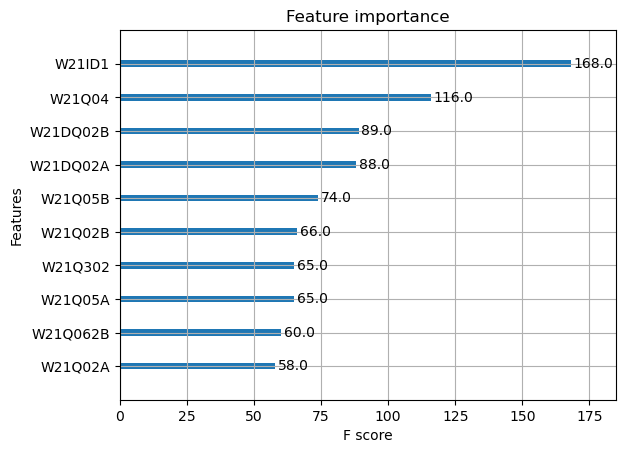


Top 10 Feature Importance:
1. W21Q25B: 0.1571
2. W21Q23B: 0.1518
3. W21Q25A: 0.0556
4. W21Q23C: 0.0344
5. W21Q25E: 0.0172
6. W21Q23A: 0.0129
7. W21Q25G: 0.0121
8. W21Q25F: 0.0115
9. W21Q23D: 0.0110
10. W21Q062B: 0.0104

 W21Q24B 

2    4144
1    1716
Name: W21Q24B, dtype: int64
2    1716
1    1716
Name: W21Q24B, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.8631732168850073


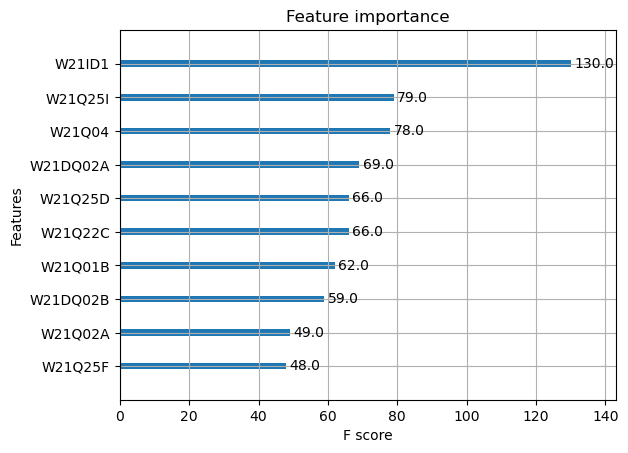


Top 10 Feature Importance:
1. W21Q25B: 0.1821
2. W21Q25D: 0.0572
3. W21Q25A: 0.0494
4. W21Q23B: 0.0404
5. W21Q22A: 0.0269
6. W21Q23C: 0.0234
7. W21Q22C: 0.0191
8. W21Q25C: 0.0181
9. W21Q12C: 0.0171
10. W21Q25I: 0.0168

 W21Q24C 

2    3855
1    1744
Name: W21Q24C, dtype: int64
2    1744
1    1744
Name: W21Q24C, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.8810888252148997


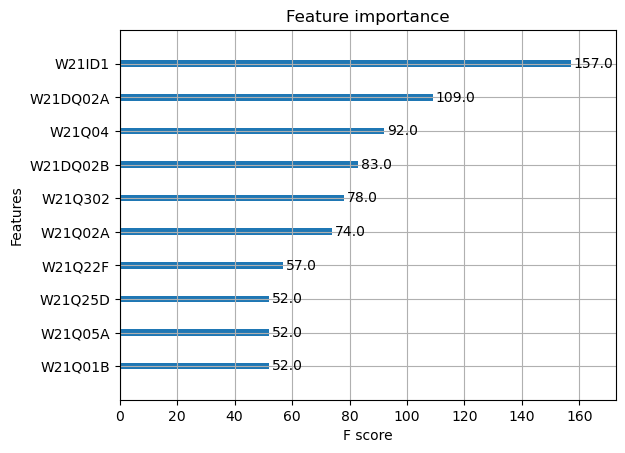


Top 10 Feature Importance:
1. W21Q25B: 0.1285
2. W21Q25D: 0.0867
3. W21Q23B: 0.0783
4. W21Q25F: 0.0544
5. W21Q23D: 0.0286
6. W21Q22D: 0.0264
7. W21Q261: 0.0240
8. W21Q22A: 0.0186
9. W21Q22F: 0.0157
10. W21Q081B: 0.0147

 W21Q24D 

2    4755
1    1008
Name: W21Q24D, dtype: int64
1    1008
2    1008
Name: W21Q24D, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.8985148514851485


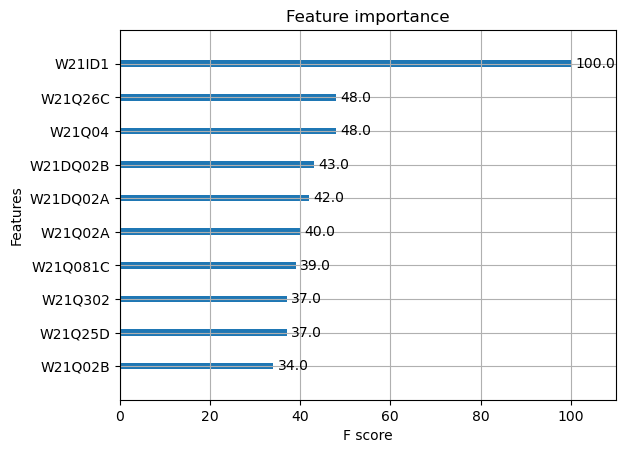


Top 10 Feature Importance:
1. W21Q25D: 0.1581
2. W21Q22D: 0.0545
3. W21Q26C: 0.0509
4. W21Q25F: 0.0473
5. W21Q25B: 0.0326
6. W21Q29: 0.0320
7. W21Q25E: 0.0256
8. W21Q261: 0.0239
9. W21Q23B: 0.0162
10. W21Q22F: 0.0147

 W21Q24E 

2    3213
1    2301
Name: W21Q24E, dtype: int64
1    2301
2    2301
Name: W21Q24E, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.9500542888165038


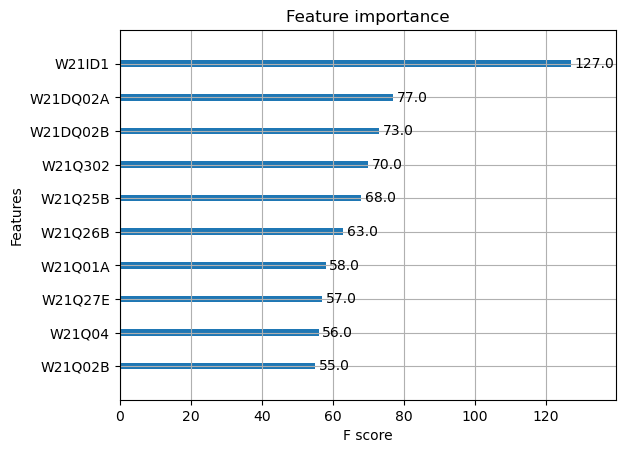


Top 10 Feature Importance:
1. W21Q25B: 0.2657
2. W21Q23A: 0.0602
3. W21Q23D: 0.0566
4. W21Q23B: 0.0429
5. W21Q261: 0.0253
6. W21Q25D: 0.0191
7. W21Q25F: 0.0146
8. W21Q26B: 0.0140
9. W21Q27D: 0.0135
10. W21Q25L: 0.0130

 W21Q24F 

2    3813
1    1757
Name: W21Q24F, dtype: int64
1    1757
2    1757
Name: W21Q24F, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.9445234708392604


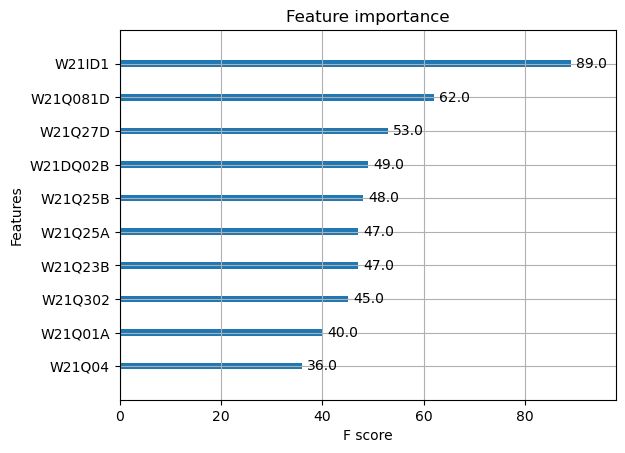


Top 10 Feature Importance:
1. W21Q25B: 0.2320
2. W21Q23B: 0.0975
3. W21Q25F: 0.0487
4. W21Q23D: 0.0410
5. W21Q23A: 0.0338
6. W21Q27D: 0.0324
7. W21Q09G: 0.0223
8. W21Q25E: 0.0187
9. W21Q25A: 0.0181
10. W21Q081D: 0.0161


In [24]:
#Multi Class - 5
Y = ['W21Q24A', 'W21Q24B', 'W21Q24C', 'W21Q24D', 'W21Q24E', 'W21Q24F']

for i in range(len(Y)):  
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    
    X, y = equal_distirubution(X, Y, i)
    
    y=y-1
    model, x_tr = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)

# 6. 직무만족 

(1)현재 하고 있는 일의 내용에 만족한다

(2)현재 받고 있는 임금에 만족한다

(3)현재 직장의 인간관계에 만족한다

하고 있는 일에 대한 전반적 만족도


 W21Q26A 

2    5484
1     835
Name: W21Q26A, dtype: int64
1    835
2    835
Name: W21Q26A, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.8682634730538922


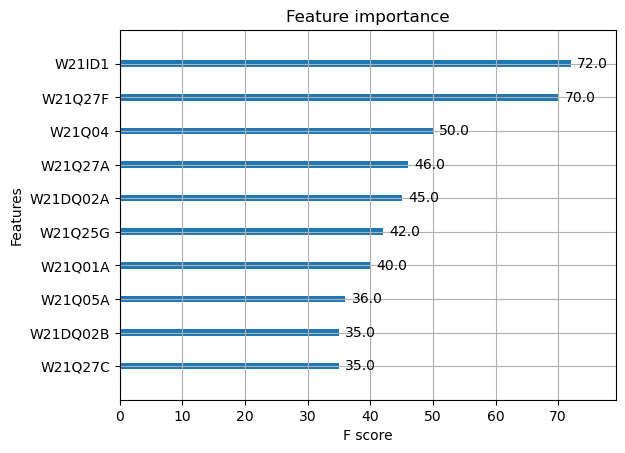


Top 10 Feature Importance:
1. W21Q27D: 0.1844
2. W21Q25E: 0.0808
3. W21Q22C: 0.0360
4. W21Q25A: 0.0359
5. W21Q24F: 0.0315
6. W21Q03A: 0.0174
7. W21Q22E: 0.0161
8. W21Q27F: 0.0151
9. W21Q22F: 0.0147
10. W21Q24C: 0.0145

 W21Q26B 

2    3494
1    2359
Name: W21Q26B, dtype: int64
2    2359
1    2359
Name: W21Q26B, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.8633474576271186


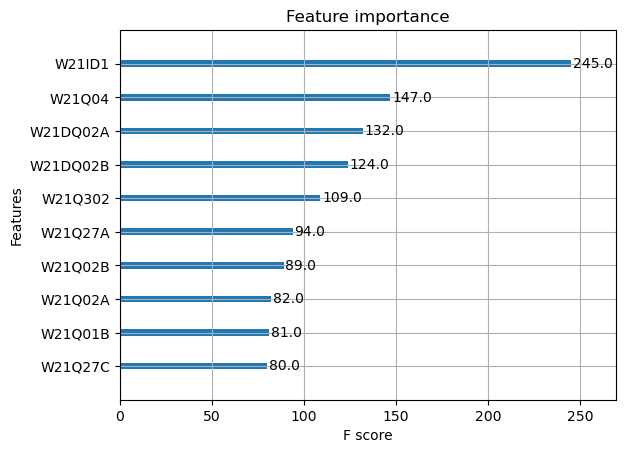


Top 10 Feature Importance:
1. W21Q27D: 0.1351
2. W21Q24F: 0.0959
3. W21Q24E: 0.0439
4. W21Q23A: 0.0304
5. W21Q28: 0.0238
6. W21Q25B: 0.0188
7. W21Q27A: 0.0184
8. W21Q25C: 0.0172
9. W21Q23C: 0.0155
10. W21Q23D: 0.0155

 W21Q26C 

2    6010
1     617
Name: W21Q26C, dtype: int64
1    617
2    617
Name: W21Q26C, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.8582995951417004


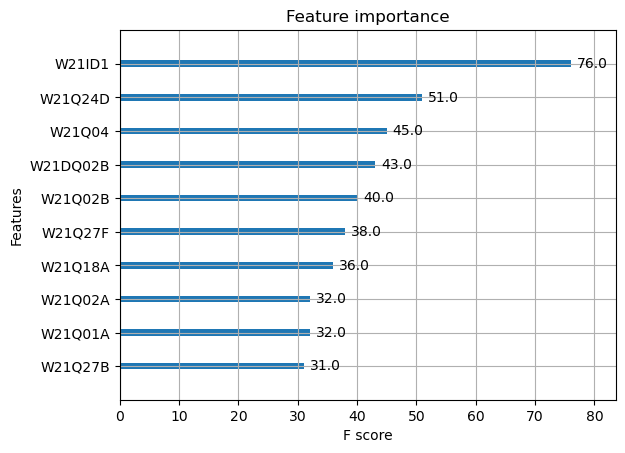


Top 10 Feature Importance:
1. W21Q24D: 0.1407
2. W21Q25D: 0.0309
3. W21Q22B: 0.0292
4. W21Q24C: 0.0289
5. W21Q25E: 0.0285
6. W21Q22D: 0.0252
7. W21Q081E: 0.0204
8. W21Q10B: 0.0188
9. W21Q25A: 0.0186
10. W21Q14F: 0.0164

 W21Q261 

2    4658
1     787
Name: W21Q261, dtype: int64
1    787
2    787
Name: W21Q261, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.9111111111111111


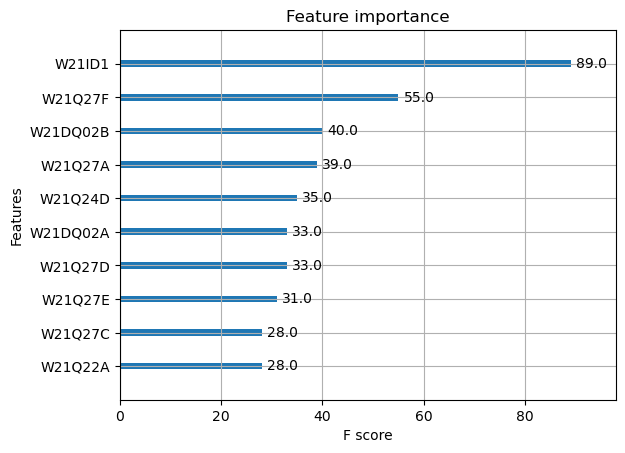


Top 10 Feature Importance:
1. W21Q24E: 0.1428
2. W21Q27D: 0.0738
3. W21Q24D: 0.0601
4. W21Q25F: 0.0538
5. W21Q16B1: 0.0278
6. W21Q25E: 0.0269
7. W21Q25B: 0.0228
8. W21Q22D: 0.0193
9. W21Q061D: 0.0177
10. W21Q23A: 0.0174


In [25]:
Y = ['W21Q26A', 'W21Q26B', 'W21Q26C', 'W21Q261']

for i in range(len(Y)):  
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    
    X, y = equal_distirubution(X, Y, i)
    
    y=y-1
    model, x_tr = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)

# 7. 조직몰입 

(1) 나는 조금이라도 좋은 조건을 제시하는 회사가 있으면 옮길 것을 고려해 보고 있다

(2) 나는 이 회사의 문제를 내 문제처럼 느낀다

(3) 만약 내가 이 회사를 떠나기로 결정한다면 내 인생의 너무 많은 것을 잃게 될 것이다

(4) 이 회사는 내가 충성할 만한 가치가 있다


 W21Q27A 

2    3684
1    2354
Name: W21Q27A, dtype: int64
2    2354
1    2354
Name: W21Q27A, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.8067940552016986


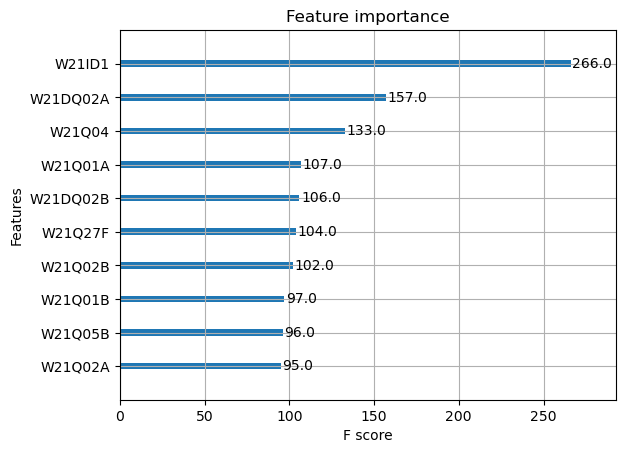


Top 10 Feature Importance:
1. W21Q261: 0.1992
2. W21Q27E: 0.0389
3. W21Q27F: 0.0194
4. W21Q26A: 0.0183
5. W21Q26B: 0.0161
6. W21DQ02A: 0.0145
7. W21Q24F: 0.0136
8. W21Q01A: 0.0130
9. W21Q25I: 0.0130
10. W21DQ01: 0.0115

 W21Q27B 

2    4765
1    1227
Name: W21Q27B, dtype: int64
1    1227
2    1227
Name: W21Q27B, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.7637474541751528


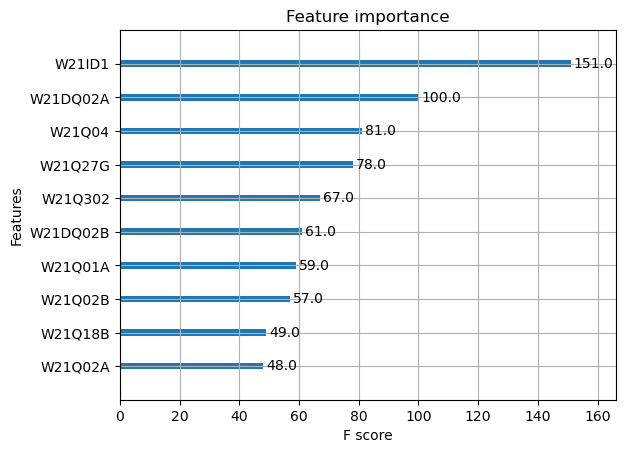


Top 10 Feature Importance:
1. W21Q261: 0.0720
2. W21Q24F: 0.0707
3. W21Q25F: 0.0318
4. W21Q10B: 0.0267
5. W21Q26A: 0.0254
6. W21Q14E: 0.0223
7. W21Q23B: 0.0172
8. W21Q01A: 0.0171
9. W21Q22B: 0.0159
10. W21DQ02A: 0.0155

 W21Q27C 

1    3409
2    2419
Name: W21Q27C, dtype: int64
2    2419
1    2419
Name: W21Q27C, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.8398760330578512


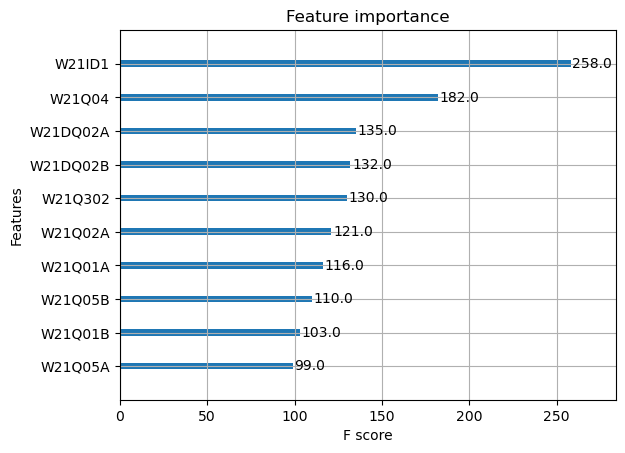


Top 10 Feature Importance:
1. W21Q261: 0.1953
2. W21Q23B: 0.0402
3. W21Q26B: 0.0200
4. W21Q01A: 0.0183
5. W21Q10B: 0.0171
6. W21Q25D: 0.0167
7. W21Q27G: 0.0154
8. W21Q24A: 0.0144
9. W21Q16C1: 0.0136
10. W21Q25A: 0.0135

 W21Q27D 

2    3509
1    1669
Name: W21Q27D, dtype: int64
1    1669
2    1669
Name: W21Q27D, dtype: int64


C:\Users\hml76\AppData\Local\Temp\ipykernel_11512\406371796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
C:\Users\hml76\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.9041916167664671


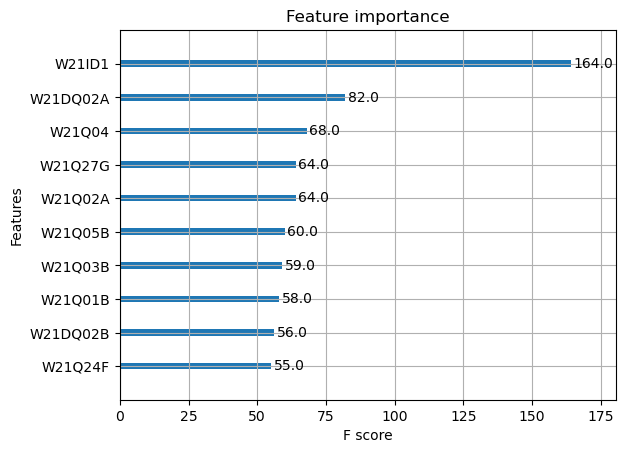


Top 10 Feature Importance:
1. W21Q24F: 0.2140
2. W21Q261: 0.1010
3. W21Q25A: 0.0383
4. W21Q25B: 0.0311
5. W21Q23B: 0.0234
6. W21Q26A: 0.0178
7. W21Q23A: 0.0178
8. W21Q25F: 0.0134
9. W21Q25E: 0.0119
10. W21Q081D: 0.0105


In [26]:
Y = ['W21Q27A', 'W21Q27B', 'W21Q27C', 'W21Q27D']

for i in range(len(Y)):  
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    
    X, y = equal_distirubution(X, Y, i)
    
    y=y-1
    model, x_tr = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=10)

# 8. 번아웃 

(6) 나는 현재 업무로 인해 무력감이나 피곤함을 느낄 때가 많아졌다

In [36]:
imp_lst1 = ['W21Q27E', 'W21Q27G', 'W21Q261', 'W21Q26A', 'W21Q27A']
imp_lst2 = ['W21ID1', 'W21Q04', 'W21Q27G', 'W21DQ02A', 'W21Q27E']

In [26]:
Y = ['W21Q27F']

for i in range(len(Y)):  
    print("\n==================================================\n", Y[i], "\n==================================================\n")
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    
    X, y = equal_distirubution(X, Y, i)
    
    y=y-1
    #X = erase_col_for_importance(X, imp_lst1)
    
    model, x_tr, x_tst, y_tst = XGBoost(X, y, num_boost_round = 300)
    feature_imp1(model, x_tr, top_k=15)


 W21Q27F 

2    3159
1    2329
Name: W21Q27F, dtype: int64
2    2329
1    2329
Name: W21Q27F, dtype: int64
	Accuracy ========>  0.8680257510729614
Index(['W21Q27E', 'W21Q27G', 'W21Q26A', 'W21Q261', 'W21Q27A', 'W21Q25I',
       'W21Q09F', 'W21Q09G', 'W21Q25H', 'W21Q061D', 'W21Q301', 'W21Q14A',
       'W21Q082D', 'W21Q15B1', 'W21Q25C'],
      dtype='object')


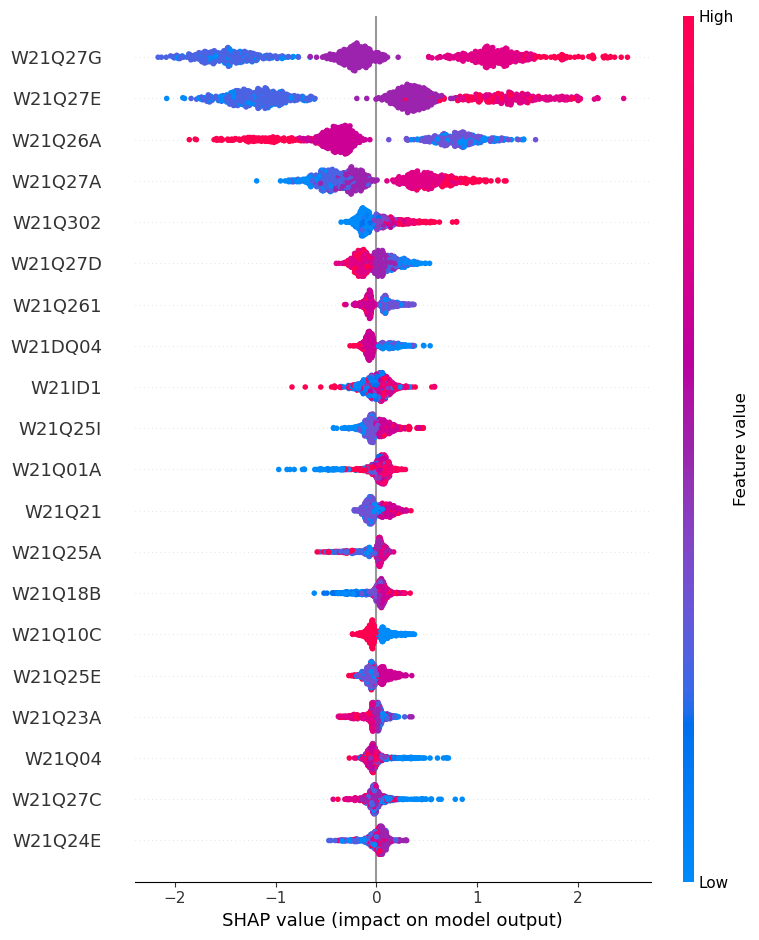

In [15]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_tst)

# Visualize SHAP values
shap.summary_plot(shap_values, x_tst)

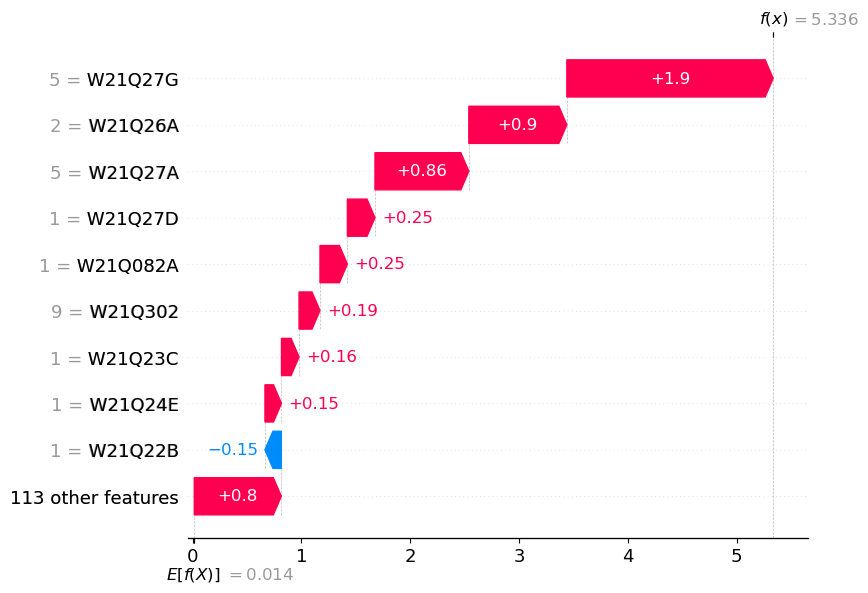

In [18]:
sv = explainer(X)
shap.plots.waterfall(sv[0])

In [20]:
import shap

shap.initjs()
sv = explainer(X)
shap.plots.force(sv[0])

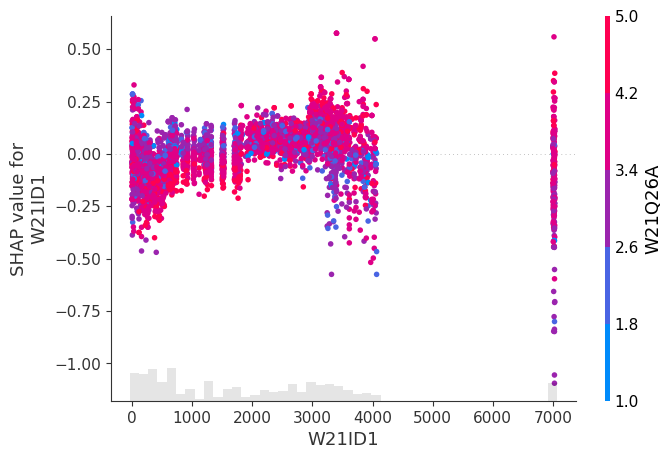

In [23]:
shap.plots.scatter(sv[:,"W21ID1"], color=sv)

In [ ]:
imp_lst1 = ['W21Q27E', 'W21Q27G', 'W21Q261', 'W21Q26A', 'W21Q27A']
imp_lst2 = ['W21ID1', 'W21Q04', 'W21Q27G', 'W21DQ02A', 'W21Q27E']

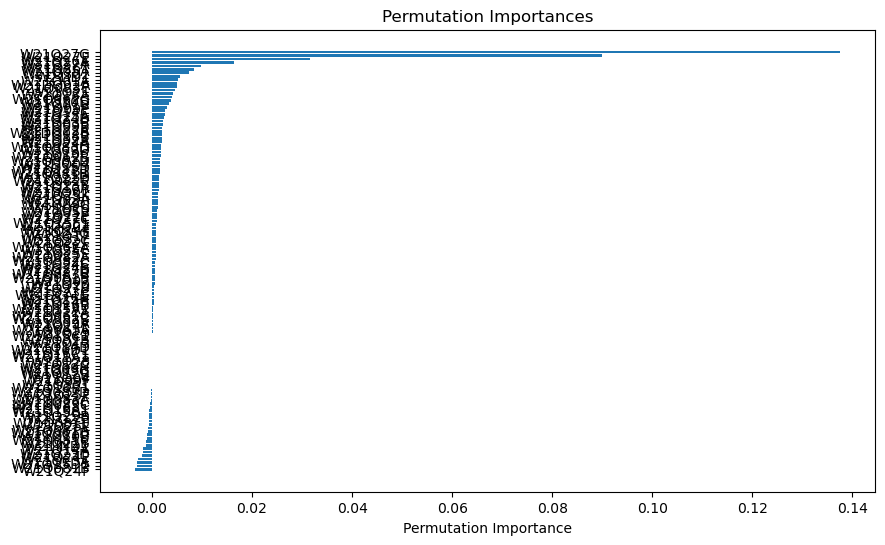

In [27]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, x_tst, y_tst, n_repeats=10, random_state=42)

feature_names = X.columns

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importances')
plt.show()

In [34]:
feature_names[sorted_idx][-10:]

Index(['W21DQ02A', 'W21Q01A', 'W21ID1', 'W21Q302', 'W21Q05A', 'W21Q261',
       'W21Q27A', 'W21Q26A', 'W21Q27E', 'W21Q27G'],
      dtype='object')

# Feature importance랑 Permutation importance는 유사함 (sorting)

# SMOTE -> data augmentation based on synthetic dataset

justification: 심하게 skewed 된 학습데이터만 증강 기법을 써서 올림 => test 데이터 자체는 그대로 유지

Overfitting 이 보이는 시점이 있음 => 실제로 어느정도는 도움이 된다는 뜻

In [ ]:
from xgboost import XGBClassifier, plot_importance
scaler = MinMaxScaler()
from imblearn.over_sampling import SMOTE

X = df_no_nan.drop(columns=[Y[target_idx]])
y = df_no_nan[Y[target_idx]] 
X_normalized = scaler.fit_transform(X)
df = pd.DataFrame(X_normalized, columns=X.columns)

print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)

print(y_resampled.value_counts())

In [ ]:
y_resampled = y_resampled - 1

X_train, X_test, y_train, y_test = train_test_split(balanced_df, y_resampled, test_size=0.2, random_state=42)

num_boost_round = 300  
model = XGBClassifier(n_estimators=num_boost_round)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=True)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)